# L6 : Linear Regression (Follow CRISP-DM)
<img src="https://www.stellarconsulting.co.nz/wp-content/uploads/2017/08/CRISP-DM_Process_1000x600.jpg" >

## Step 1: Load Data 

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

name="2330"
data = pd.read_csv(name+".csv")  #1102 2454 2330
# plt.scatter(data['y'],data['x1'])
data.isnull().any()
data = data.fillna(method='ffill')
# plt.scatter(data['x'],data['y']) 



## Step 2: Prepare X, Y

In [105]:
X=data[['x1','x2','x3','x4']].values.reshape(-1,4)
Y=data['y'].values.reshape(-1,1)
print(X.shape)
print(Y.shape)


(240, 4)
(240, 1)


## Step 3: Model Training

In [106]:
from sklearn.linear_model import LinearRegression as LR 
model = LR()
model.fit(X,Y)
# a= float(model.coef_)
# b=float(model.intercept_)
# print(a,b)
# print(type(a),type(b))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 4: Predict
*  y =ax+b
    * a= model.coef_
    * b=model.intercept_
* print(a,b)

In [107]:
preY=model.predict(X)
a = model.coef_
b= model.intercept_
import numpy as np
_X =np.array([i for i in range(1000)]).reshape(-1,1)
_Y =np.array(a*_X+b).reshape(-1,1)

print(_X.shape,_Y.shape)




(1000, 1) (4000, 1)


## Step 5: Model Evaluation

In [108]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import  r2_score as R2

print('r2=',R2(preY,Y)) 
print('mse=',MSE(preY,Y)) 


r2= 0.9779011702312944
mse= 24.453136027621966


## Step 6: Deploy 

In [118]:
test = pd.read_csv(name+"_test.csv")   #1102_test 2454_test 2330_test 
testX=test[['x1','x2','x3','x4']].values.reshape(-1,4)
testY=model.predict(testX)
test['y']=testY
test.to_csv(name+"_test.csv",index=False,mode='w')


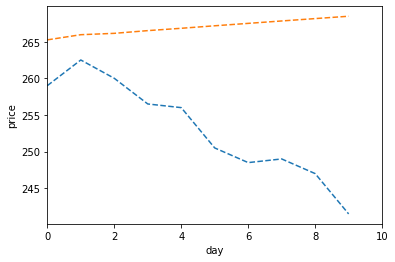

In [127]:
# show圖
n1='2330'  #'1102' 2454' '2330'


datan1=pd.read_csv(n1+"_test.csv")  
datano=pd.read_csv(n1+".csv")  
plt.xlim(0, 10)
plt.ylabel("price")
plt.xlabel("day")
plt.plot(datano['y'].head(10),'--',datan1['y'],'--')
plt.show()

